In [1]:
pip install pandas_datareader


[notice] A new release of pip available: 22.1.2 -> 22.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
start= '2010-01-01'
end= '2022-06-30'

df=data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434926
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546383
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430343


In [4]:
df=df.reset_index()
df=df.drop(['Date','Adj Close'], axis=1)

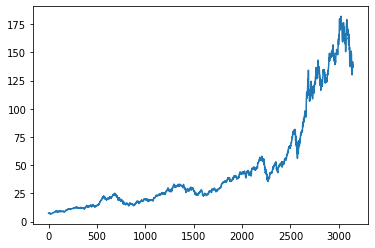

In [5]:
plt.plot(df.Close)

In [6]:
ma100= df.Close.rolling(100).mean()

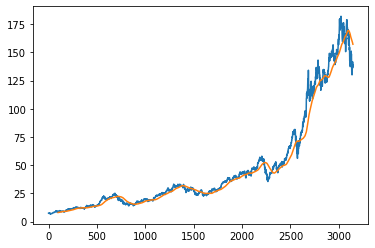

In [7]:
plt.Figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100)

In [8]:
ma200= df.Close.rolling(200).mean()

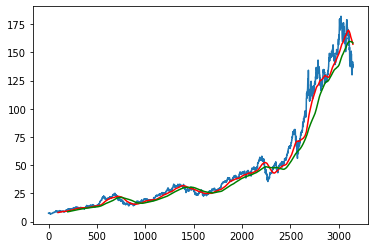

In [9]:
plt.Figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200, 'g')

In [10]:
df.shape

(3146, 5)

In [11]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7): int(len(df))])

In [12]:
from sklearn.preprocessing import MinMaxScaler
scalar= MinMaxScaler(feature_range=(0,1))

In [13]:
data_training_array = scalar.fit_transform(data_training)
data_training_array

array([[0.01328146],
       [0.01561354],
       [0.01587662],
       ...,
       [0.96048261],
       [0.98302841],
       [0.98696029]])

In [14]:
X_train=[]
Y_train=[]
for i in range(100,data_training_array.shape[0]):
    X_train.append(data_training_array[i-100: i])
    Y_train.append(data_training_array[i, 0])
X_train,Y_train=np.array(X_train),np.array(Y_train)

In [15]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [16]:
model= Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [18]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train,Y_train,epochs=50)

Epoch 1/50
66/66 [==============================] - 40s 395ms/step - loss: 0.0271
Epoch 2/50
66/66 [==============================] - 24s 370ms/step - loss: 0.0060
Epoch 3/50
66/66 [==============================] - 14s 212ms/step - loss: 0.0047
Epoch 4/50
66/66 [==============================] - 9s 141ms/step - loss: 0.0045
Epoch 5/50
66/66 [==============================] - 10s 149ms/step - loss: 0.0042
Epoch 6/50
66/66 [==============================] - 9s 134ms/step - loss: 0.0048
Epoch 7/50
66/66 [==============================] - 9s 133ms/step - loss: 0.0041
Epoch 8/50
66/66 [==============================] - 10s 149ms/step - loss: 0.0037
Epoch 9/50
66/66 [==============================] - 11s 172ms/step - loss: 0.0040
Epoch 10/50
66/66 [==============================] - 9s 141ms/step - loss: 0.0037
Epoch 11/50
66/66 [==============================] - 9s 131ms/step - loss: 0.0036
Epoch 12/50
66/66 [==============================] - 9s 131ms/step - loss: 0.0036
Epoch 13/50
66/66 [

In [19]:
model.save('model.h5')

In [20]:
data_testing.head()

,Close
2202,56.814999
2203,57.320000
2204,58.017502
2205,56.997501
2206,56.072498


In [21]:
past_100_days= data_training.tail(100)

In [22]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\Ankit Nag\AppData\Local\Temp\ipykernel_4276\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [23]:
input_data=scalar.fit_transform(final_df)

In [32]:
X_test = []
Y_test=[]
for i in range(100, input_data.shape[0]):
    X_test.append(input_data[i-100:i])
    Y_test.append(input_data[i,0])

In [33]:
X_test, Y_test = np.array(X_test), np.array(Y_test)
print(X_test.shape)
print(Y_test.shape)

(944, 100, 1)
(944,)


In [27]:
Y_pred=model.predict(X_test)

30/30 [==============================] - 1s 38ms/step


In [28]:
Y_pred.shape

(944, 1)

In [29]:
scalar.scale_

array([0.00682769])

In [30]:
scale_factor = 1/0.00682769
Y_pred = Y_pred*scale_factor
Y_test = Y_test*scale_factor

In [35]:
Y_test

array([0.14520781, 0.1486558 , 0.15341813, 0.14645388, 0.14013825,
       0.13925067, 0.14454211, 0.12660237, 0.12334215, 0.13641717,
       0.1283093 , 0.13648544, 0.13484681, 0.12602203, 0.13163779,
       0.13392506, 0.13747546, 0.12443458, 0.13247419, 0.12649996,
       0.11956987, 0.1213792 , 0.13086968, 0.13660494, 0.1114449 ,
       0.10139113, 0.10511224, 0.115661  , 0.11316891, 0.10630708,
       0.08872578, 0.08541435, 0.07614578, 0.08401469, 0.08763335,
       0.07454126, 0.05938379, 0.05904241, 0.05137833, 0.05535546,
       0.05470684, 0.06614321, 0.06377059, 0.06211488, 0.07276608,
       0.0588888 , 0.05552616, 0.04489204, 0.04678673, 0.04513101,
       0.04593327, 0.04909106, 0.03975419, 0.03712555, 0.0407613 ,
       0.03191943, 0.02498933, 0.0145771 , 0.00792012, 0.02556968,
       0.02382861, 0.02396517, 0.02654264, 0.02684987, 0.        ,
       0.010361  , 0.00979771, 0.01461125, 0.01898096, 0.01981736,
       0.01723989, 0.01333105, 0.01857132, 0.02176325, 0.02333

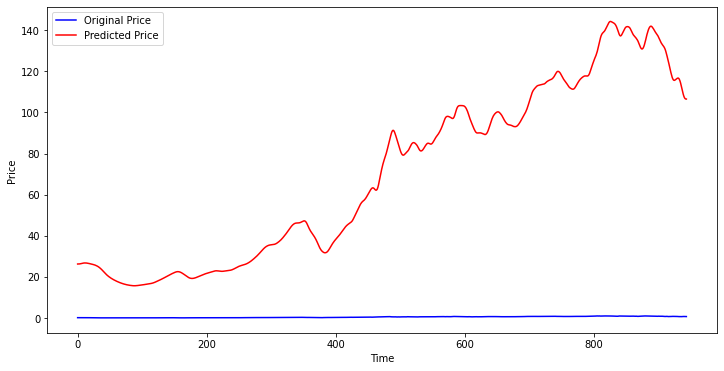

In [34]:
plt.figure(figsize=(12,6))
plt.plot(Y_test, 'b', label = 'Original Price')
plt.plot(Y_pred, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()